# 按機型分類分類

**機型分類的出現次數**

In [6]:
import pandas as pd
import numpy as np

# 讀取資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/short_flight_final.csv'
df = pd.read_csv(data_path)

# 計算機型組合出現次數
aircraft_combinations_count = df['機型分類'].value_counts()

# 將結果轉為 DataFrame，方便查看
result_df = aircraft_combinations_count.reset_index()
result_df.columns = ['機型分類', '出現次數']

# 排序按次數降序排列
result_df = result_df.sort_values(by='出現次數', ascending=False).reset_index(drop=True)
print(result_df)

# 顯示機型分類=-1的資料
print(df[df['機型分類'] == -1])

# 移除包含 NaN 的數據
plot_data = df.dropna(subset=["平均價格_log", "最低價格_log", "最低價格剩餘天數", "價格變異_log", "中位數價格_log", "機型分類"])

   機型分類  出現次數
0     1  6701
1     0  3621
2     2   136
3    -1     1
            出發日期  星期    出發時間  出發時段 出發機場代號     抵達時間  抵達時段 抵達機場代號  機場分類  航空公司  \
5212  2025-01-21  週二  清晨7:55  早晨班機    TPE  上午11:20  上午抵達    ICN   1.0  中華航空   

      ...  最低價格_log 價格變異_log 中位數價格_log 最低價格天數  Region Cost of Living Index  \
5212  ...      9.75    15.48     10.02     15      韓國                 60.1   

      GDP (PPP) per capita (in thousand USD)      經濟指標      機場指標  \
5212                                  60.046 -0.059982  1.591339   

     competing_flights  
5212                 4  

[1 rows x 41 columns]


**Boxplot（按機型分類分類）**

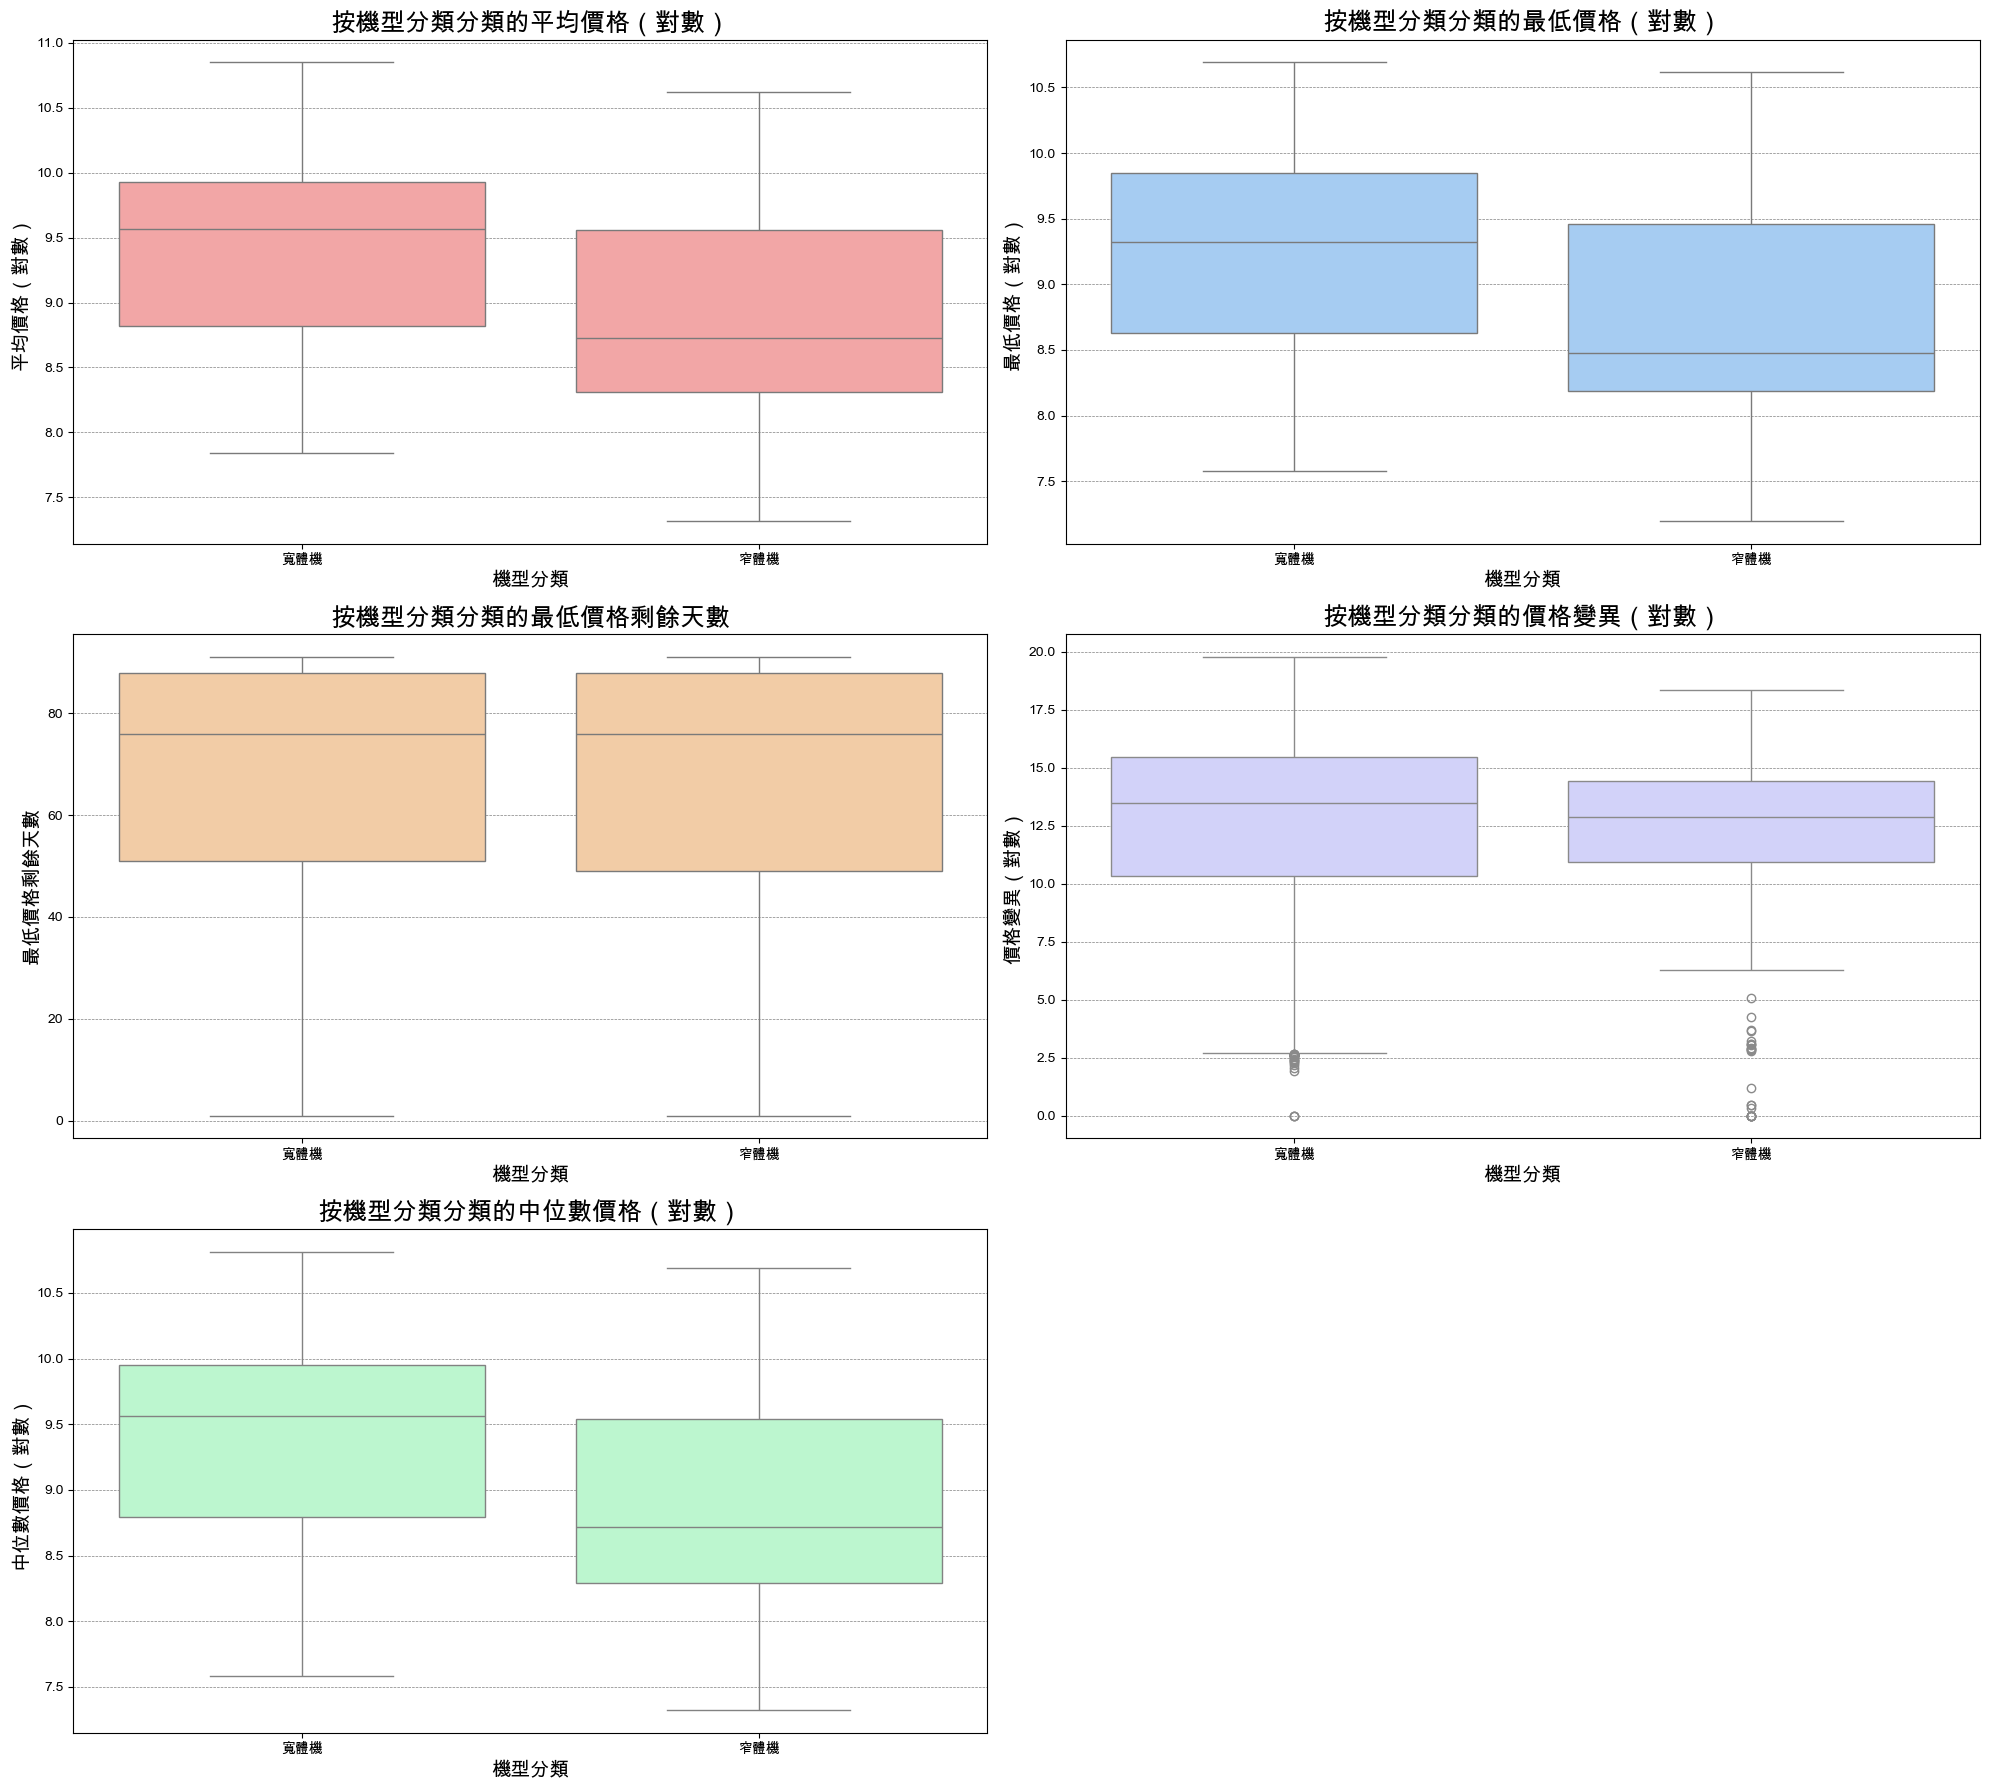

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 機型分類映射
category_mapping = {0: '窄體機', 1: '寬體機'}

# 替換機型分類
plot_data['機型分類'] = plot_data['機型分類'].map(category_mapping)

# 保留機型分類為「窄體機」、「寬體機」的數據
plot_data = plot_data[plot_data['機型分類'].isin(category_mapping.values())]

# 創建子圖，分別繪製對數轉換後的盒狀圖
fig, axes = plt.subplots(3, 2, figsize=(20, 18))  # 更新為 3x2 網格

# 調整圖表標題字體大小
title_fontsize = 18
label_fontsize = 14

# 第一個子圖：按機型分類分類的平均價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='機型分類', y='平均價格_log', ax=axes[0, 0], color='#FF9999')
axes[0, 0].set_title('按機型分類分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('機型分類', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二個子圖：按機型分類分類的最低價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='機型分類', y='最低價格_log', ax=axes[0, 1], color='#99CCFF')
axes[0, 1].set_title('按機型分類分類的最低價格（對數）', fontsize=title_fontsize)
axes[0, 1].set_xlabel('機型分類', fontsize=label_fontsize)
axes[0, 1].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三個子圖：按機型分類分類的最低價格剩餘天數的盒狀圖
sns.boxplot(data=plot_data, x='機型分類', y='最低價格剩餘天數', ax=axes[1, 0], color='#FFCC99')
axes[1, 0].set_title('按機型分類分類的最低價格剩餘天數', fontsize=title_fontsize)
axes[1, 0].set_xlabel('機型分類', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格剩餘天數', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四個子圖：按機型分類分類的價格變異（對數）的盒狀圖
sns.boxplot(data=plot_data, x='機型分類', y='價格變異_log', ax=axes[1, 1], color='#CCCCFF')
axes[1, 1].set_title('按機型分類分類的價格變異（對數）', fontsize=title_fontsize)
axes[1, 1].set_xlabel('機型分類', fontsize=label_fontsize)
axes[1, 1].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第五個子圖：按機型分類分類的中位數價格（對數）的盒狀圖
sns.boxplot(data=plot_data, x='機型分類', y='中位數價格_log', ax=axes[2, 0], color='#B3FFCC')
axes[2, 0].set_title('按機型分類分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('機型分類', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 移除未使用的子圖
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

**Kruskal-Wallis H Test**

In [8]:
from scipy.stats import kruskal

# 提取需要分析的數據
anova_data = df[['機型分類', '平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數']].dropna()

# Kruskal-Wallis 檢測函數
def perform_kruskal(data, response_var):
    # 分組數據
    groups = [data[data['機型分類'] == alliance][response_var] for alliance in data['機型分類'].unique()]
    stat, p_value = kruskal(*groups)
    return stat, p_value

# 儲存檢測結果
results = []

# 分別對每個變量進行檢測
for var in ['平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數']:
    stat, p_value = perform_kruskal(anova_data, var)
    results.append({
        "變數": var,
        "H-statistic": stat,
        "p-value": p_value,
        "顯著性": "顯著" if p_value and p_value < 0.05 else "不顯著"
    })
        
# 將結果轉為 DataFrame 以便查看
results_df = pd.DataFrame(results)

# 顯示結果
print(results_df)

          變數  H-statistic        p-value  顯著性
0   平均價格_log  1361.047666  8.345456e-295   顯著
1   最低價格_log  1481.956841   0.000000e+00  不顯著
2  中位數價格_log  1350.617186  1.530142e-292   顯著
3   價格變異_log   141.785361   1.557712e-30   顯著
4   最低價格剩餘天數     9.662985   2.165921e-02   顯著


**Boxplot/Histogram**
（按機型分類分類）

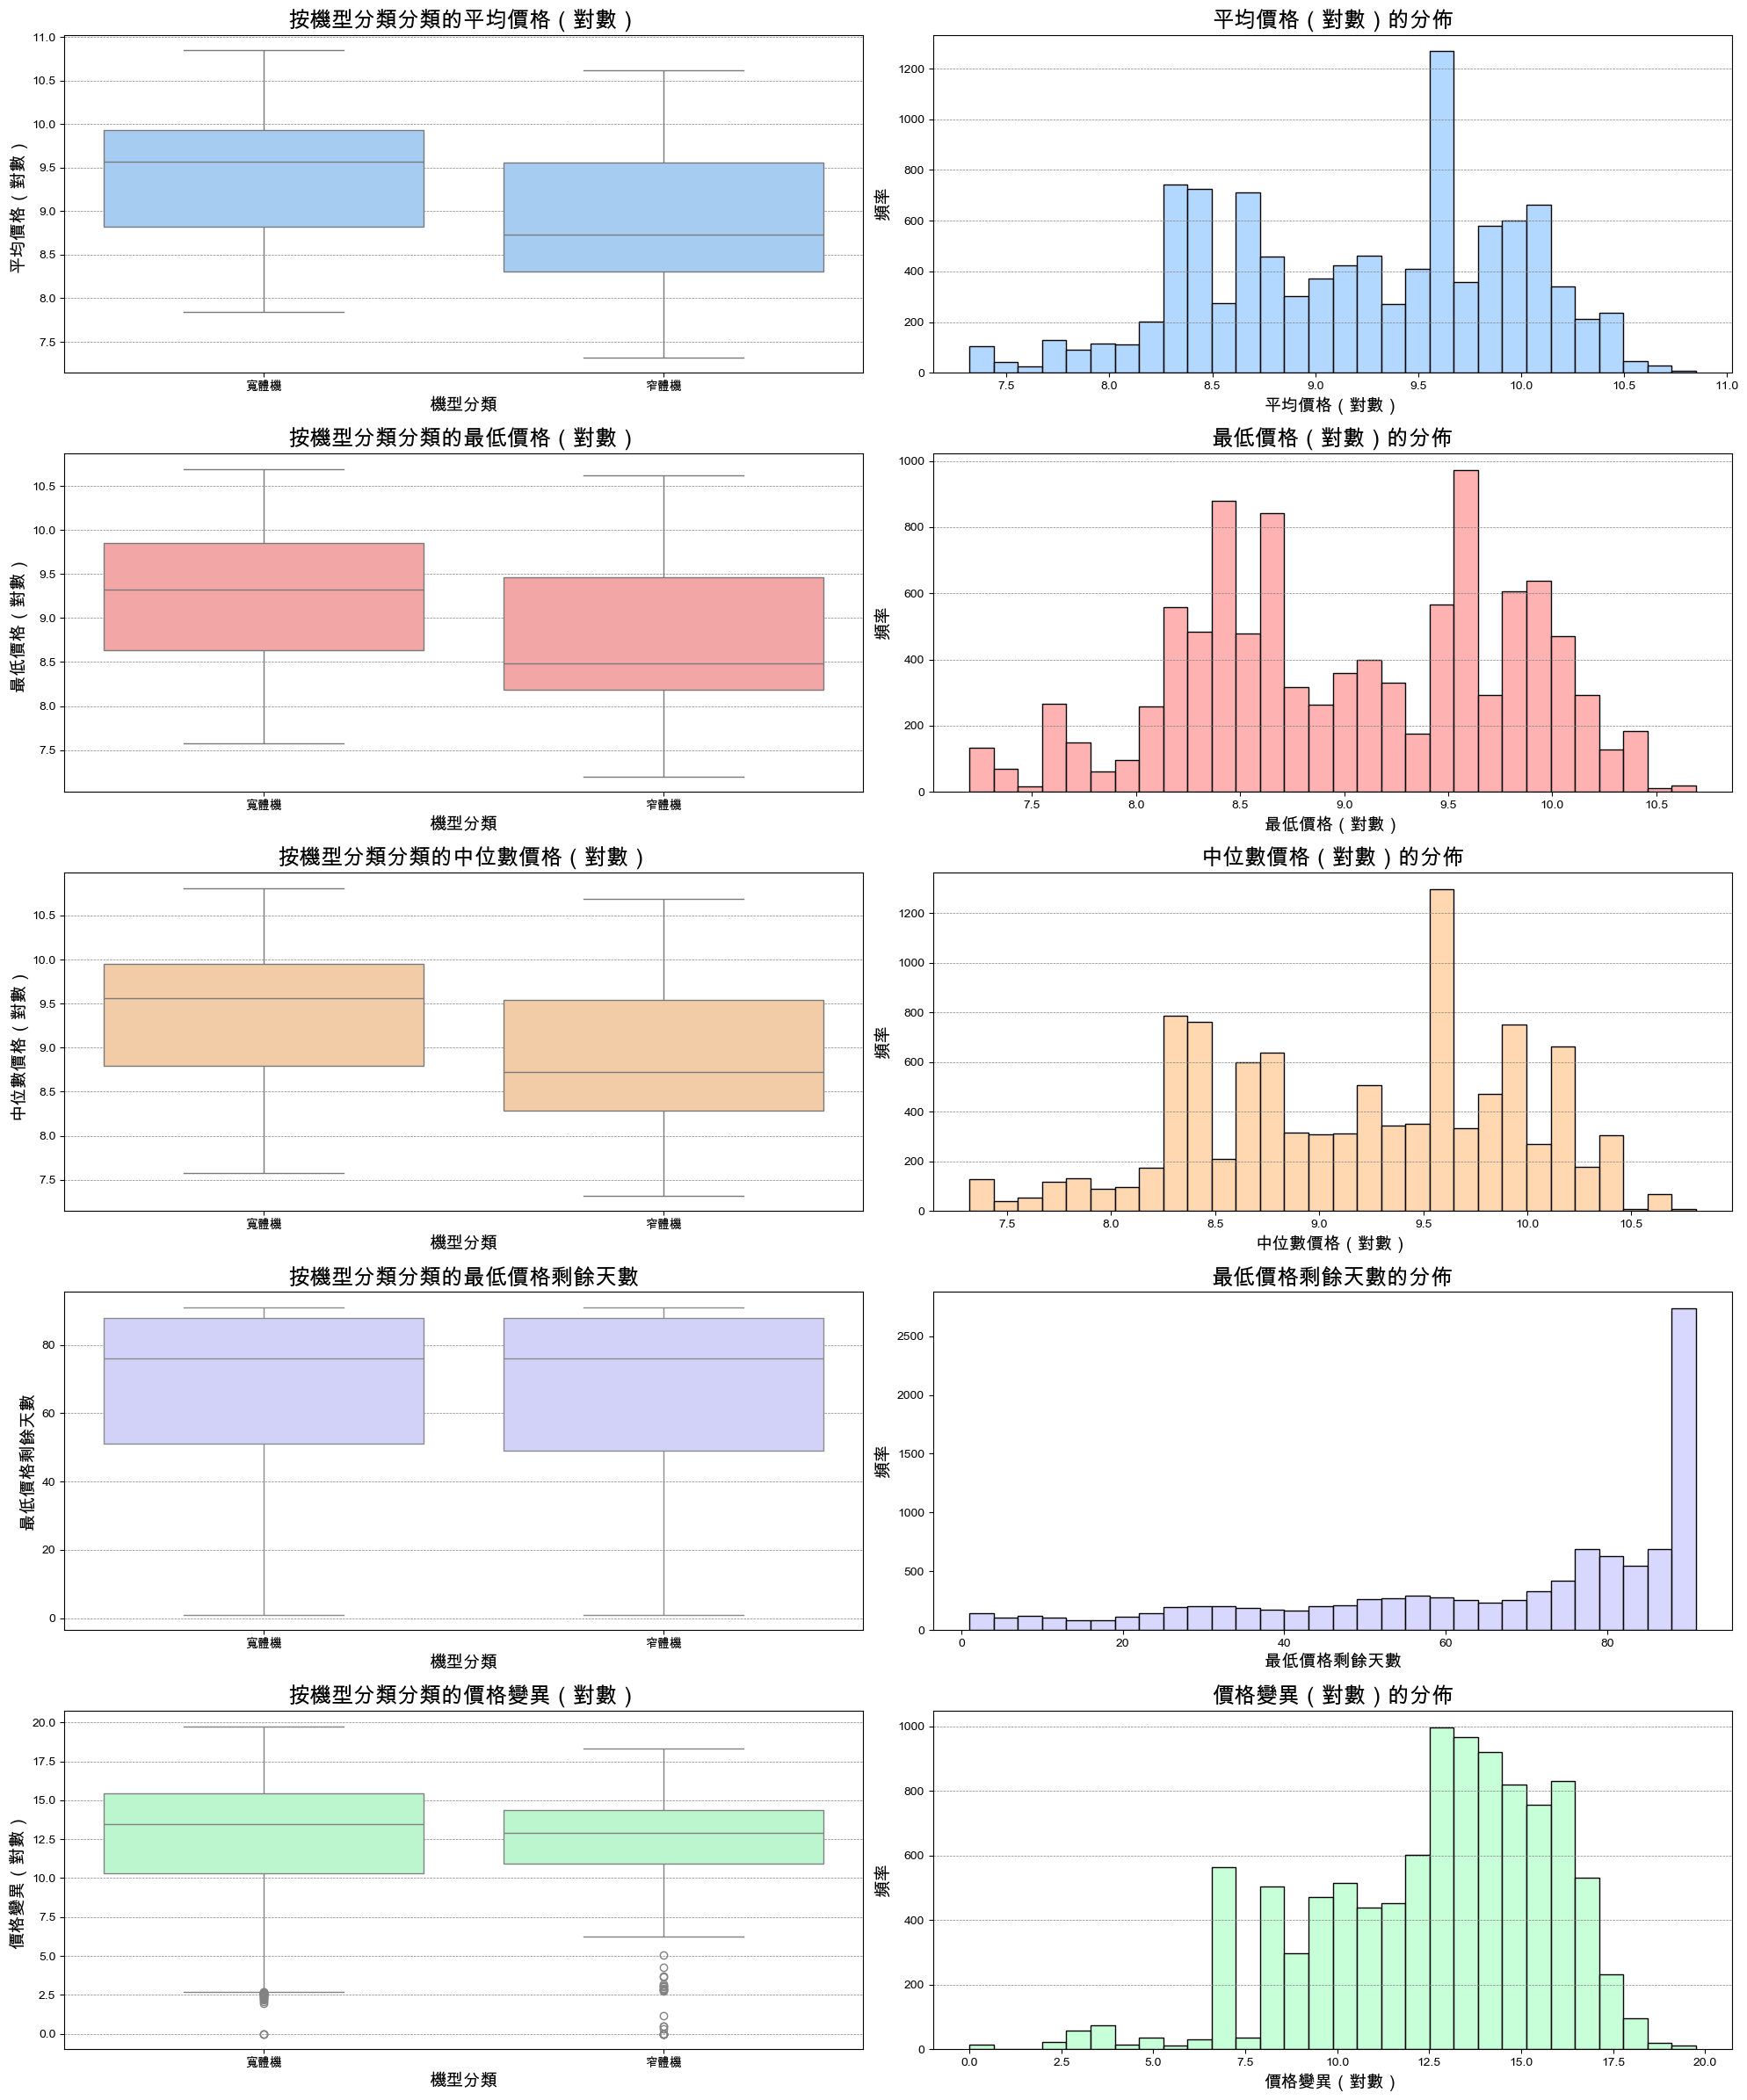

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 創建 5x2 子圖
fig, axes = plt.subplots(5, 2, figsize=(20, 24))
bins=30

# 調整字體大小
title_fontsize = 18
label_fontsize = 14

# 第一行子圖：機型分類分類的平均價格（對數）
sns.boxplot(data=plot_data, x='機型分類', y='平均價格_log', ax=axes[0, 0], color='#99CCFF')
axes[0, 0].set_title('按機型分類分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('機型分類', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['平均價格_log'], kde=False, color='#99CCFF', ax=axes[0, 1], bins=bins)
axes[0, 1].set_title('平均價格（對數）的分佈', fontsize=title_fontsize)
axes[0, 1].set_xlabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二行子圖：機型分類分類的最低價格（對數）
sns.boxplot(data=plot_data, x='機型分類', y='最低價格_log', ax=axes[1, 0], color='#FF9999')
axes[1, 0].set_title('按機型分類分類的最低價格（對數）', fontsize=title_fontsize)
axes[1, 0].set_xlabel('機型分類', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格_log'], kde=False, color='#FF9999', ax=axes[1, 1], bins=bins)
axes[1, 1].set_title('最低價格（對數）的分佈', fontsize=title_fontsize)
axes[1, 1].set_xlabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三行子圖：機型分類分類的中位數價格（對數）
sns.boxplot(data=plot_data, x='機型分類', y='中位數價格_log', ax=axes[2, 0], color='#FFCC99')
axes[2, 0].set_title('按機型分類分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('機型分類', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['中位數價格_log'], kde=False, color='#FFCC99', ax=axes[2, 1], bins=bins)
axes[2, 1].set_title('中位數價格（對數）的分佈', fontsize=title_fontsize)
axes[2, 1].set_xlabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[2, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四行子圖：機型分類分類的最低價格剩餘天數
sns.boxplot(data=plot_data, x='機型分類', y='最低價格剩餘天數', ax=axes[3, 0], color='#CCCCFF')
axes[3, 0].set_title('按機型分類分類的最低價格剩餘天數', fontsize=title_fontsize)
axes[3, 0].set_xlabel('機型分類', fontsize=label_fontsize)
axes[3, 0].set_ylabel('最低價格剩餘天數', fontsize=label_fontsize)
axes[3, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格剩餘天數'], kde=False, color='#CCCCFF', ax=axes[3, 1], bins=bins)
axes[3, 1].set_title('最低價格剩餘天數的分佈', fontsize=title_fontsize)
axes[3, 1].set_xlabel('最低價格剩餘天數', fontsize=label_fontsize)
axes[3, 1].set_ylabel('頻率', fontsize=label_fontsize)

# 第五行子圖：機型分類分類的價格變異（對數）
sns.boxplot(data=plot_data, x='機型分類', y='價格變異_log', ax=axes[4, 0], color='#B3FFCC')
axes[4, 0].set_title('按機型分類分類的價格變異（對數）', fontsize=title_fontsize)
axes[4, 0].set_xlabel('機型分類', fontsize=label_fontsize)
axes[4, 0].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['價格變異_log'], kde=False, color='#B3FFCC', ax=axes[4, 1], bins=bins)
axes[4, 1].set_title('價格變異（對數）的分佈', fontsize=title_fontsize)
axes[4, 1].set_xlabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[4, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 自動調整子圖間距
plt.tight_layout()
plt.show()